In [5]:
import pandas as pd
titanic_df=pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline

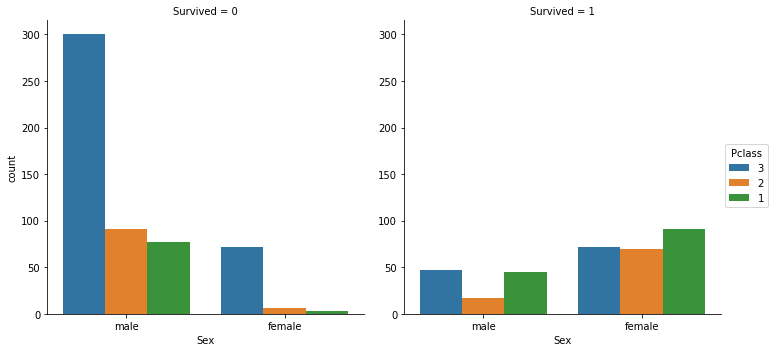

In [9]:
#Who were the passengers
sb.factorplot("Sex", hue="Pclass", hue_order=[3,2,1], size=5, col="Survived", data=titanic_df, kind="count")

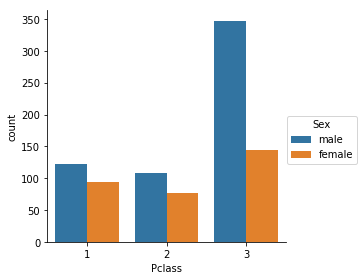

In [59]:
sb.factorplot("Pclass",hue="Sex",data=titanic_df, kind="count")

In [66]:
titanic_df["New"]=titanic_df["Sex"]
titanic_df["New"].loc[titanic_df["Age"]<16]="Child"
titanic_df.head(8)

C:\Users\vishal\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,New
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,No,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,No,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,No,Child


In [72]:
#How many children were there
def mfc(passenger):
    age,sex=passenger
    if age<16:
        return "child"
    else:
        return sex

In [73]:
df1=titanic_df[["Age","Sex"]]
titanic_df["Person"]=df1.apply(mfc,axis=1)


In [74]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,New
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,No,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,No,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,No,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,Yes,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,Yes,Child


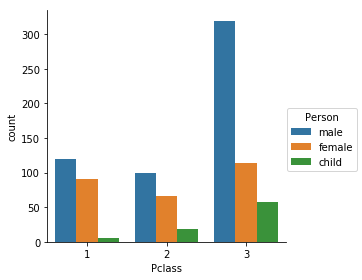

In [75]:
sb.factorplot("Pclass",hue="Person",data=titanic_df, kind="count")

In [85]:
#What are last name of the passengers
def last_name(list1):
    return list1[0]
    
titanic_df["Name"].str.split(",").apply(last_name).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

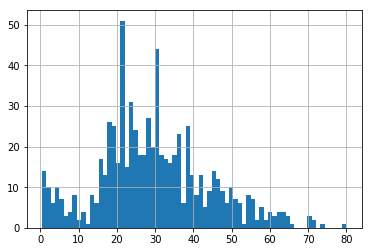

In [86]:
#Age distribution of passengers
titanic_df["Age"].hist(bins=70)

In [87]:
#Mean of age
titanic_df["Age"].mean()

29.69911764705882

In [88]:
#Number of passengers on each class
people_pclass=titanic_df["Pclass"].value_counts()
people_pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64

<function matplotlib.pyplot.show>

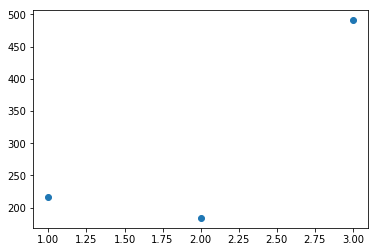

In [90]:
plt.plot(people_pclass,"o")
plt.show

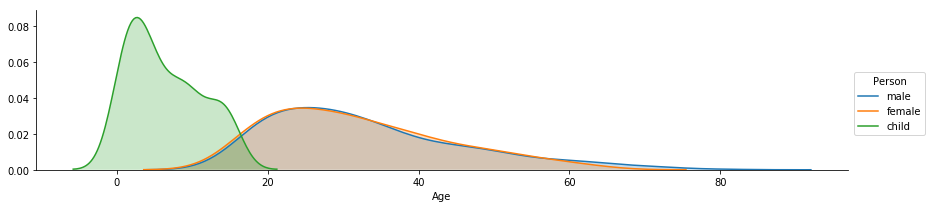

In [92]:
fig=sb.FacetGrid(titanic_df, hue="Person", aspect=4)
fig.map(sb.kdeplot,"Age",shade=True)
fig.add_legend()

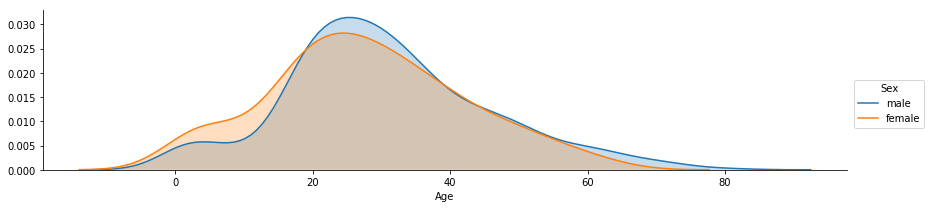

In [21]:
fig=sb.FacetGrid(titanic_df, hue="Sex", aspect=4)
fig.map(sb.kdeplot,"Age",shade=True)
fig.add_legend()

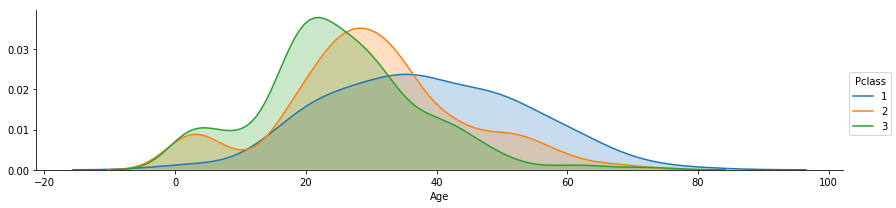

In [109]:
fig=sb.FacetGrid(data=titanic_df, hue="Pclass", aspect=4)
fig.map(sb.kdeplot,"Age",shade=True)
fig.add_legend()

In [114]:
#Passengers belongs to which cabin
deck=titanic_df["Cabin"].dropna()

In [115]:
levels=[]
for i in deck:
    levels.append(i[0])

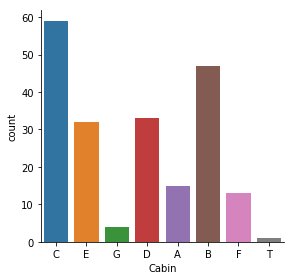

In [116]:
cabin_df= pd.DataFrame(levels, columns=["Cabin"])
sb.factorplot("Cabin",data=cabin_df,kind="count")

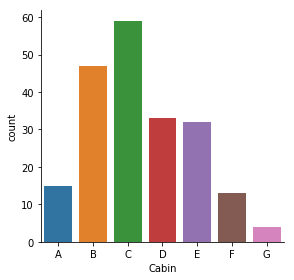

In [117]:
cabin_df=cabin_df[cabin_df.Cabin != "T"]
sb.factorplot("Cabin",data=cabin_df,order=["A","B","C","D","E","F","G"], kind="count")

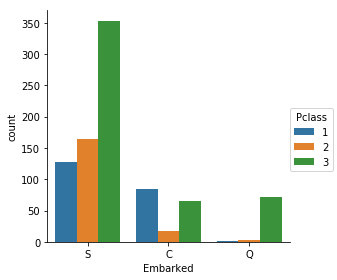

In [120]:
#Passengers belongs to which city
sb.factorplot("Embarked", data=titanic_df, hue="Pclass", kind="count")

In [29]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female


In [121]:
#Passengers are with family
titanic_df["Alone"]=titanic_df.SibSp + titanic_df.Parch
titanic_df["Alone"].loc[titanic_df["Alone"]>0]="With Family"
titanic_df["Alone"].loc[titanic_df["Alone"]==0]="Alone"
titanic_df.head(3)

C:\Users\vishal\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,New
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,female


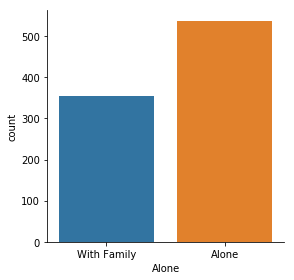

In [43]:
sb.factorplot("Alone",data=titanic_df,kind="count")

In [48]:
titanic_df["Survivor"]=titanic_df.Survived.map({0:"No",1:"Yes"})


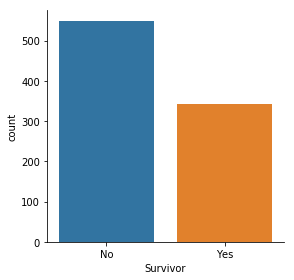

In [122]:
sb.factorplot("Survivor",data=titanic_df,kind="count")

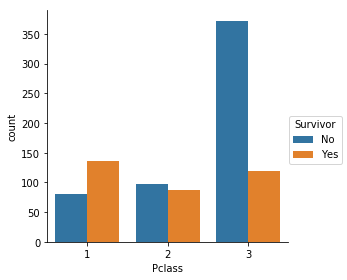

In [125]:
sb.factorplot("Pclass",hue="Survivor",data=titanic_df, kind="count")

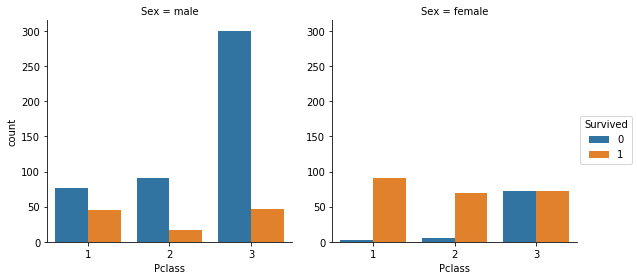

In [53]:
sb.factorplot("Pclass",hue="Survived",col="Sex", data=titanic_df, kind="count")

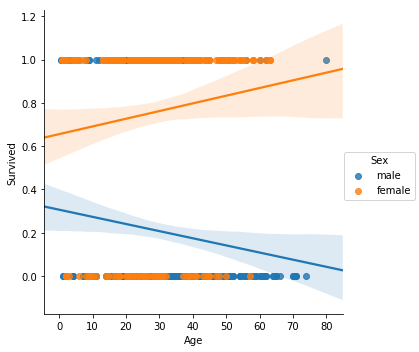

In [126]:
sb.lmplot("Age","Survived",hue="Sex", data=titanic_df)

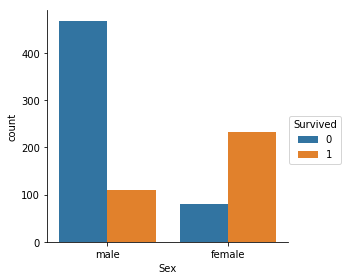

In [130]:
sb.factorplot("Sex",hue="Survived", data=titanic_df, kind="count")